$
\newcommand{\X}{\mathtt{X}} %Matrice de Pauli X
\newcommand{\W}{\mathtt{W}}
\newcommand{\Y}{\mathtt{Y}} %Matrice de Pauli Y
\newcommand{\Z}{\mathtt{Z}} %Matrice de Pauli Z
\newcommand{\I}{\mathbb{I}} %Opérateur Identité I
\newcommand{bra}[1]{\langle#1\vert} %bra
\newcommand{ket}[1]{\vert#1\rangle} %ket
\newcommand{\proj}[1]{\ket{#1}\bra{#1}} % Projecteur
\newcommand{\av}[1]{\langle#1\rangle} % average
\newcommand{\mel}[3]{\bra{#1}#2\ket{#3}} %Matrix element
\newcommand{\bk}[2]{\langle#1\ket{#2}} %Scalar product
$

\title{TUTORIEL 3 SUR QISKIT: OPERATIONS USUELLES SUR QISKIT SUR QISKIT}
\author{}
\maketitle

<section class="post-featured-photo" style="background:linear-gradient(rgba(18, 50, 99, 0.9), rgba(12, 69, 138, 0.5)), no-repeat top; background-size:cover;">
    <font color="yellow" >
    <ol>
        Orlane Zang, orlane.zang@facsciences.cm
    </ol>
    </font>
    <font color="white" >
    <ul><li>Department of Physics, Faculty of Science, University of Yaounde I</li></ul>
        <ul><li> Quantum optics research team of UYI, Neo-Quanticians
        </font>       


<div class="alert alert-info">
    
![logo Qiskit!]( ./Graphics/logo.png "This is the logo" )
    
</div>




# ACQUIS
   <div class="alert alert-warning">
   <strong>
       <ul><li>  Effectuer les opérations non unitaires (Mesure, réinitialisation, opérations conditionnées,initialisation arbitraire...)</li></ul>
       <ul><li> Effectuer d'autres opérations usuelles (produit tensoriel, produit entre opérateurs,...) </li></ul>
           </strong>
</div>

In [179]:
import numpy as np #Pour les claculs numériques
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer) #Contient toutes vos opérations quantiques, Aer gère les backends des simulateurs, "execute" exécute le circuit
from qiskit.tools.visualization import circuit_drawer, array_to_latex #circuit_drawer dessine le circuit et array_to_latex écrit les tableaux sous forme LaTeX
from qiskit.providers.aer import QasmSimulator #Pour le simulateur de circuits haute performance d'Aer
from qiskit.visualization import plot_histogram #Pour la création de vos histogrammes

In [177]:
np.set_printoptions(precision=4, suppress=True) #Cette ligne est importatnte pour la précision numérique sur Python

# OPERATIONS NON-UNITAIRES SUR QISKIT

## MESURE

   * Comme nous l'avons vu plus haut, une façon d'évaluer les probabilités d'obtention des états à la sortie d'un circuit en utilisant le simulateur **QasmSimulator** de la manière suivante:

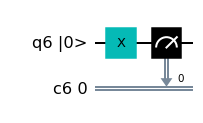

In [180]:
cr1=ClassicalRegister(1) #Registre classique à un bit classique
qx=QuantumCircuit(qr1,cr1)
qx.x(0)
qx.measure(qr1, cr1)
qx.draw('mpl', initial_state=True)

In [181]:
q_sim = QasmSimulator()

# Execute the circuit on the simulator and grab the results
result2 = q_sim.run(qx, shots=1024).result()

# Aggregate binary outcomes of the circuit 
result2.get_counts(qx)

{'1': 1024}

* Le simulateur nous dit bien qu'à la sortie on aura toujours $\ket{1}$

* Une autre façon est de déclarer le qubit initial et de le faire évaluer dans le circuit. Mais pour ça comme nous l'avons dit, le circuit ne doit pas avoir de bits classiques. Donc nous allons d'abord retirer les appareils de mesure:

In [182]:
qx.remove_final_measurements() #Instruction pour retirer les appareils de mesure
ket0=Statevector.from_label('0') #Déclaration de l'état initial ket 0
ket01= ket0.evolve(qx) #Le faire évaluer dans le circuit
ket01.probabilities() #Extraire les probabilités de l'état à la sortie

array([0., 1.])

* Le résultat nous dit qu'on obtient $\ket{0}$ avec une probabilité nulle et $\ket{1}$ avec une probabilité certaine.



In [183]:
ket0=Statevector.from_label('1') #Ici, je définis mon état initial à ket1
ket01= ket0.evolve(qx) #Le faire évaluer dans le circuit
ket01.probabilities() #Extraire les probabilités de l'état à la sortie

array([1., 0.])

* Le résultat nous dit qu'on obtient $\ket{1}$ avec une probabilité nulle et $\ket{0}$ avec une probabilité certaine.

<div class="alert alert-info">
  <strong>Conclusion: Lorsqu'on est amené à faire évaluer un état à travers un circuit quantique, pour effectuer la mesure sur l'état final, on utilise l'une ou l'autre de ces méthodes.</strong>
</div>

## Réinialisation

Il est possible de réinitialiser un qubit à la sortie d'une porte au milieu d'un circuit en utilisant `reset`. Nous allons prendre quelques exemples pour mieux expliquer ça.

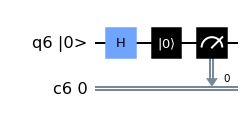

In [184]:
qe1 = QuantumCircuit(qr1, cr1)
qe1.h(qr1)
qe1.reset(qr1[0]) #Réinitialiser l'état du premier fil à la sortie de H à 0
qe1.measure(qr1, cr1)
qe1.draw('mpl', initial_state=True)

* A la sortie de la porte H, c'est normalement $\ket{\psi} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}$ qu'on devait avoir, mais parce qu'on l'a réinitialisé à 0, après mesure on aura l'état $\ket{0}$ avec une probabilité certaine. Nous le vérifions ci-dessus:

In [185]:
e1 = q_sim.run(qe1, shots=1024)
e1.result().get_counts(qe1)

{'0': 1024}

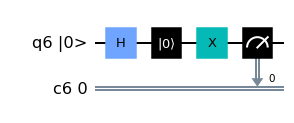

In [186]:
#Ajoutons maintenant X après réinitialisation
qe1 = QuantumCircuit(qr1, cr1)
qe1.h(qr1)
qe1.reset(qr1[0]) 
qe1.x(0)
qe1.measure(qr1, cr1)
qe1.draw('mpl', initial_state=True)

In [187]:
e2 = q_sim.run(qe1, shots=1024)
e2.result().get_counts(qe1)

{'1': 1024}

* Après ajout de la porte X après avoir réinitialiser le qubit à la sortie de H, la mesure nous montre bien qu'on obtient $\ket{1}$ à la sortie.

## Les opérations conditionnelles

Sur Qiskit, il est possible d'effectuer des opérations conditionnelles dépendant du résultat obtenu sur le régistre après une mesure. Pour mieux m'expliquer je vais prendre des exemples. Considérons un circuit quantique constitué de la porte de Pauli X. 

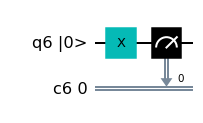

In [188]:
qb4c4 = QuantumCircuit(qr1, cr1)
qb4c4.x(0)
qb4c4.measure(qr1, cr1)
qb4c4.draw('mpl', initial_state=True)

* Nous savons que la mesure de l'état à la sortie sera toujours $1$

In [189]:
ex1= q_sim.run(qb4c4, shots=1024)
ex1.result().get_counts(qb4c4)

{'1': 1024}

* Maintenant nous allons poser une condition après la mesure qui applique une autre porte X au résultat s'il est égal à $1$

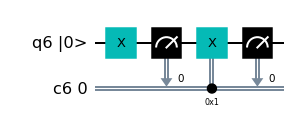

In [190]:
qb4c4 = QuantumCircuit(qr1, cr1)
qb4c4.x(0)
qb4c4.measure(qr1, cr1)
qb4c4.x(qr1[0]).c_if(cr1, 1) #Condition: si le résultat de la mesure donne 1 alors X agira sur le qubit de sortie
qb4c4.measure(qr1, cr1)
qb4c4.draw('mpl', initial_state=True)

Vu que le résultat sera toujours 1 alors la deuxième porte X sera appliqué au $\ket{1}$ qui en sortira et à la sortie du circuit on aura finalement $\ket{0}$. Pour le vérifier effectuons encore la mesure:

In [88]:
ex2= q_sim.run(qb4c4, shots=1024)
ex2.result().get_counts(qb4c4)

{'0': 1024}

* On trouve bien $0$. Si on avait plutôt conditionné l'action de la deuxième porte X par $0$, elle n'aurait pas eu d'effet. 

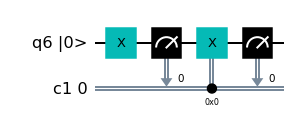

In [89]:
qb4c4 = QuantumCircuit(qr1, cr1)
qb4c4.x(0)
qb4c4.measure(qr1, cr1)
qb4c4.x(qr1[0]).c_if(cr1, 0)
qb4c4.measure(qr1, cr1)
qb4c4.draw('mpl', initial_state=True)

In [90]:
ex2= q_sim.run(qb4c4, shots=1024)
ex2.result().get_counts(qb4c4)

{'1': 1024}

## Initialisation arbitraire

Il est possible sur Qiskit d'avoir à l'entrée d'un circuit un état personnalisé (différent de $\ket{0}, \ket{00}, \ket{000}, ...$) à condition que l'état soit normé et que la relation de complétude soit respectée. Pour expliquer cela nous allons prendre quelques exemples:

Alors sachant qu'un circuit prend en entrée le nombre de qubits correpondand au nombre de fils qu'il contient, et sachant aussi qu'avec 

* la base single qubit, on peut avoir les états suivants:

\begin{equation}\label{eq:eq1}
\ket{0}, \ket{1}, \alpha \ket{0} + \beta \ket{1}, \ \ |\alpha|^{2} + |\beta|^{2}=1,
\end{equation}

* La base 2-qubit on peut avoir les états suivants:

\begin{equation} \label{eq:eq2}
\ket{00}, \ket{01}, \ket{10}, \ket{11}, \ \ \text{ou la superposition de ces états} 
\end{equation}

* La base 3-qubit on peut avoir les états:
\begin{equation}\label{eq:eq3}
\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}, \ \ \text{ou la superposition de ces états},...
\end{equation}


dans un circuit à un fil on peut faire évaluer l'un des vecteurs de base de \eqref{eq:eq1}, dans un circuit à deux fils on peut faire évaluer l'un des vecteurs de base de \eqref{eq:eq2}, dans un circuit à 3 fils on peut faire évaluer l'un des vecteur de base de \eqref{eq:eq3} ou dans chaque cas tous les évaluer en même temps(superposés): c'est la notion de **parallélisme quantique**.



<div class="alert alert-info">
  <strong>Prenons donc 3 exemples de trois vecteurs superposés, 1-qubit, 2-qubit et 3-qubit et initialisons les à l'entrée d'un circuit à 1 fil, à 2 fils et 3 fils respectivement.</strong>
</div>

\begin{equation}
\ket{\psi_1} = \frac{1}{\sqrt{2}} ( \ket{0} + \ket{1})
\end{equation}

\begin{equation}
\ket{\psi_2} = \frac{1}{\sqrt{3}} [\ket{00} + \ket{01} + \ket{10}]
\end{equation}


\begin{equation}
\ket{\psi_3} = -\frac{i}{\sqrt{8}}|000\rangle+\frac{1}{\sqrt{8}}|010\rangle+\frac{1-i}{4}|011\rangle+\frac{1+2i}{\sqrt{8}}|111\rangle.
\end{equation}

* <font color="red" >
    <ol>
        Le travail se fera 3 en étapes:
    </ol>
    </font>
    
1. Initialisations de l'état
  
  
2. Création des régistres et du circuit
  
  
3. Initialisation du circuit à l'état initialisé au 1

<font color="purple" >
    <ol>
        Tout d'abord l'importation suivante est nécessaire:
    </ol>
    </font>

In [191]:
import math as mt

In [192]:
# Initialisation des vecteurs
psi1= [(1/mt.sqrt(2))*complex(1,0), (1/mt.sqrt(2))*complex(1,0)]
psi2=[1/mt.sqrt(3)*complex(1,0), 1/mt.sqrt(3)*complex(1,0), 1/mt.sqrt(3)*complex(1,0),0]
psi3= [
    (1/ mt.sqrt(8)) * complex(0, -1),
    0,
    (1/ mt.sqrt(8)) * complex(1, 0),
    (1/ 4) * complex(1, -1),
    0,
    0,
    0,
    (1/ mt.sqrt(8)) * complex(1, 2)]

In [193]:
#Affichage sous latex de Psi1
array_to_latex(psi1)

<IPython.core.display.Latex object>

In [95]:
array_to_latex(psi2)

<IPython.core.display.Latex object>

In [175]:
array_to_latex(psi3)

<IPython.core.display.Latex object>

In [128]:
#Initialisation des circuits
e1=QuantumCircuit(qr1)
e2=QuantumCircuit(qr2)
e3=QuantumCircuit(qr3)

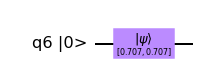

In [129]:
e1.initialize(psi1, [qr1[0]]) # Initialisation du circuit e1 à l'état psi1
e1.draw('mpl', initial_state=True)

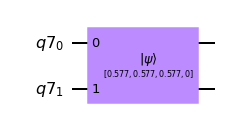

In [99]:
# Initialisation de e2 à psi2
e2.initialize(psi2, [qr2[0], qr2[1]])
e2.draw('mpl')

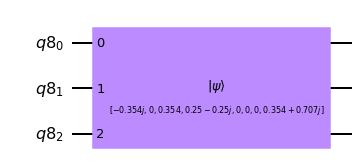

In [100]:
e3.initialize(psi3, [qr3[0],qr3[1],qr3[2]])
e3.draw('mpl')

* Après ces initialisations, nous allons ajouter au premier circuit la porte de Hadarmard et évaluer le résultat à la sortie. Manuellement, on devra obtenir à la sortie:

\begin{align}
H \ket{\psi_1} &= \frac{1}{\sqrt{2}} (H\ket{0} + H \ket{1}) \\ &=\frac{1}{\sqrt{2}}[\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) + \frac{1}{\sqrt{2}}(\ket{0} - \ket{1}] \\ &= \ket{0}
\end{align}

<div class="alert alert-info">
  <strong>Implémentation avec Qiskit</strong>
</div>

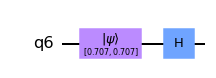

In [130]:
e1.h(0)
e1.draw('mpl')

In [134]:
from qiskit.providers.aer import StatevectorSimulator #Importation nécessaire pour la mesure
S_sim= StatevectorSimulator() #Simulateur des vecteurs d'états aléatoires

re1 = S_sim.run(e1, shots=2000).result()
sortie = re1.get_statevector(e1)
array_to_latex(sortie, prefix='|\\psi_1s\\rangle = ')

<IPython.core.display.Latex object>

* On voit bien qu'à la sortie on a le vecteur $\ket{0}$.

* Vous pourrez vous amuser à ajouter des portes sur d'autres circuits et évaluer à chaque fois le résulats manuellement et avec Qiskit.

# Autres opérations pouvant être faites sur Qiskit

Dans la suite, nous présenterons cette partie avec des exemples expliqués.


## Fidélité

La fidélité définie plus haut permet de vérifier si deux vecteurs sont égaux. Un exemple, nous allons évaluer la fidélité entre deux vecteurs $\ket{0}$ et $\ket{1}$:

In [143]:
from qiskit.quantum_info import state_fidelity
phi1=Statevector.from_label('0')
phi2=Statevector.from_label('1')
state_fidelity(phi1, phi2)

0.0

* La projection de $\ket{0}$ sur $\ket{1}$ est nulle, alors les deux vecteurs sont différents.

## Produit tensoriel

Soit à faire les produits tensoriels $\X \otimes \X$, $\Y \otimes \I$, $\mathtt{H} \otimes \Z$.

In [155]:
#Autre manière de déclarer des opérateurs de Pauli sur Qiskit
from qiskit.quantum_info.operators import Operator, Pauli
X=Operator(Pauli('X'))
Y=Operator(Pauli('Y'))
Z=Operator(Pauli('Z'))
I=Operator(Pauli('I'))
H=(X+Z)/(np.sqrt(2))

In [157]:
XX=Operator(Pauli('XX')) #Produit tensoriel de X et X
array_to_latex(XX, prefix='X\\otimes X=')

<IPython.core.display.Latex object>

In [158]:
YI=Operator(Pauli('YI')) #Produit tensoriel de Y et l'identité
array_to_latex(YI, prefix='Y\\otimes I=')

<IPython.core.display.Latex object>

In [159]:
XZ=Operator(Pauli('XZ')) #Produit tensoriel de H et Z
array_to_latex(XZ, prefix='X\\otimes Z=')

<IPython.core.display.Latex object>

* Basiquement on fait le produit tensoriel avec `tensor`

In [161]:
HZ= H.tensor(Z)
array_to_latex(HZ, prefix='H\\otimes Z=')

<IPython.core.display.Latex object>

* Le produit tensoriel inverse se fait grâce à `expand`

In [162]:
ZH=H.expand(Z)
array_to_latex(ZH, prefix='Z\\otimes H=')

<IPython.core.display.Latex object>

## Produit entre opérateurs

Il se fait grâce à `compose`

In [163]:
#Première méthode
Z.X=X.compose(Z)
array_to_latex(Z.X, prefix='Z\\cdot X=')

<IPython.core.display.Latex object>

In [166]:
#Deuxième méthode
X.Z=X.compose(Z, front=True)
array_to_latex(X.Z, prefix='X\\cdot Z=')

<IPython.core.display.Latex object>

## Comparaison d'opérateurs

In [170]:
X==Y

False

In [168]:
import qiskit.tools.jupyter
%qiskit_version_table